In [1]:
from pymongo import MongoClient
import pymongo
import json
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

%matplotlib inline

## 1. Populate Dataframes

In [2]:
# read from csv files

articleDF = pd.read_csv(r'news.csv',encoding='latin-1')
 
topicsDF = pd.read_csv(r'topics.csv',encoding='latin-1')

twitterDF = pd.read_csv(r'twitter.csv',encoding='latin-1')

In [3]:
# Total size of the news
print('Total number of articles: ' + str(articleDF.size))

Total number of articles: 16176


In [4]:
# Total number for each company
wf_articleDF= articleDF[articleDF.source == 'WF']
print("WF Articles: "+ str(wf_articleDF.size))

sap_articleDF = articleDF[articleDF.source == 'SAP']
print("SAP Articles: "+ str(sap_articleDF.size))

ww_articleDF = articleDF[articleDF.source == 'WW']
print("WeWork Articles: "+ str(ww_articleDF.size))


WF Articles: 3000
SAP Articles: 3984
WeWork Articles: 9192


In [5]:
# Total number for each company
wf_twitterDF= twitterDF[twitterDF.source == 'WF']
print("WF Twits: "+ str(wf_twitterDF.size))

sap_twitterDF = twitterDF[twitterDF.source == 'SAP']
print("SAP Twits: "+ str(sap_twitterDF.size))

ww_twitterDF = twitterDF[twitterDF.source == 'WW']
print("WeWork Twits: "+ str(ww_twitterDF.size))

WF Twits: 12120
SAP Twits: 13740
WeWork Twits: 16000


## 2. Describe dataframes - News

In [6]:
wf_articleDF.head()

,Unnamed: 0,id,title,description,content,URL,createdTimestamp,lang,isRelated,source,sourceDate,NP
0,0,5dbf6fd211bb5a181c167f4e,How Peloton dramatically changed my life: Tech...,Weekly highlight of Yahoo Finance's top tech n...,"Wednesday, September 25, 2019\r\nGet Yahoo Fin...",https://finance.yahoo.com/news/peloton-dramati...,2019-09-25 20:15:00,en,N,WF,2019-09-25 00:00:00,NaN
1,1,5dbf6fd311bb5a181c167f4f,Juul boss exits in vaping crisis as Philip Mor...,"Juul Labs, in which tobacco giant Altria Group...",The chief executive of e-cigarette maker Juul ...,https://economictimes.indiatimes.com/news/inte...,2019-09-25 17:57:59,en,N,WF,2019-09-25 00:00:00,NaN
2,2,5dbf6fd311bb5a181c167f50,Urban Innovation Experts and Tech Luminaries T...,"SAN FRANCISCO, Sept. 25, 2019 /PRNewswire/ -- ...","SAN FRANCISCO, Sept. 25, 2019 /PRNewswire/ --Â...",https://www.prnewswire.com/news-releases/urban...,2019-09-25 16:03:00,en,N,WF,2019-09-25 00:00:00,NaN
3,3,5dbf6fd311bb5a181c167f51,19 of the most powerful women in global finance,Alison Rose will succeed Ross McEwan as CEO of...,"One of the ""big four"" banks in Britain has app...",https://www.businessinsider.com/here-are-the-w...,2019-09-25 15:35:41,en,N,WF,2019-09-25 00:00:00,NaN
4,4,5dbf6fd311bb5a181c167f52,Nike posts 'rock-solid' Q1 with strong women's...,"Despite looming tariffs, CEO Mark Parker expre...",Dive Brief:\r\n<ul><li>Nike on Tuesday announc...,https://www.retaildive.com/news/nike-posts-roc...,2019-09-25 15:15:00,en,N,WF,2019-09-25 00:00:00,NaN


### 2.1. Plot # of tweets per day. If more than 100 then plot the difference between Min and Max timestamp. 


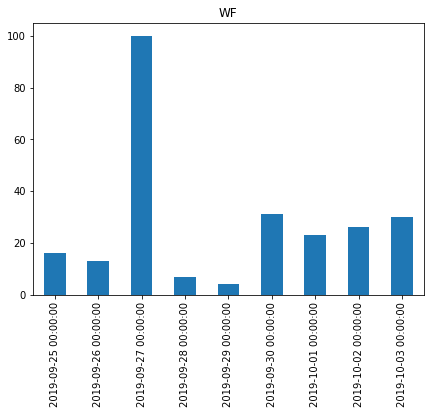

In [7]:
plt.rcParams["figure.figsize"] = (7,5)
wf_articleDF['sourceDate'].value_counts().sort_index().plot(kind='bar', title='WF');
# Announced on 09/27.

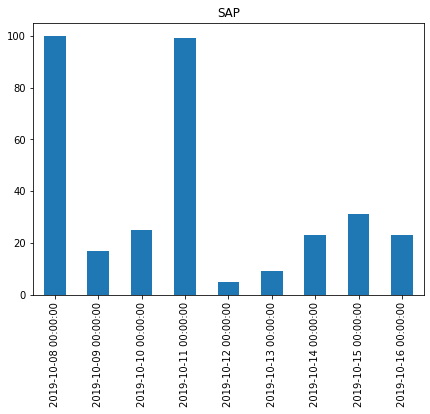

In [8]:
plt.rcParams["figure.figsize"] = (7,5)
sap_articleDF['sourceDate'].value_counts().sort_index().plot(kind='bar', title='SAP');
# Announced on 10/11 but because it was announced in Germany, it was announced on 10/10 US time.

Because there is only max of 100 tweets that can be pulled from the twitter source per day, if there is more than 100 articles, I am plotting the time delta between in min and max of the tweets subtracted by 1 day. Time delta can be used to extrapolate how much more tweets were generated per day comparatively. 

                                    max                 min              diff
sourceDate                                                                   
2019-10-08 00:00:00 2019-10-09 00:00:00 2019-10-02 08:00:49 -6 days +08:00:49
2019-10-09 00:00:00 2019-10-09 23:30:51 2019-10-09 06:59:09   0 days 07:28:18
2019-10-10 00:00:00 2019-10-10 23:38:45 2019-10-10 02:19:19   0 days 02:40:34
2019-10-11 00:00:00 2019-10-11 22:56:00 2019-10-11 05:24:00   0 days 06:28:00
2019-10-12 00:00:00 2019-10-12 12:00:00 2019-10-12 00:10:19   0 days 12:10:19
2019-10-13 00:00:00 2019-10-13 22:30:02 2019-10-13 13:32:16   0 days 15:02:14
2019-10-14 00:00:00 2019-10-14 18:35:06 2019-10-14 01:31:28   0 days 06:56:22
2019-10-15 00:00:00 2019-10-15 23:28:50 2019-10-15 01:40:00   0 days 02:11:10
2019-10-16 00:00:00 2019-10-16 23:01:07 2019-10-16 00:00:00   0 days 00:58:53


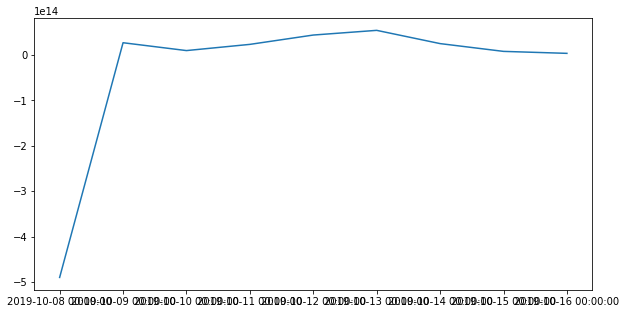

In [9]:
sap_result = sap_articleDF.groupby('sourceDate')['createdTimestamp'].agg(['max','min'])

sap_result['max'] =  pd.to_datetime(sap_result['max'], format='%Y-%m-%d %H:%M:%S')
sap_result['min'] =  pd.to_datetime(sap_result['min'], format='%Y-%m-%d %H:%M:%S')

sap_result['diff'] = timedelta(days=1) - (sap_result['max']-sap_result['min'])

sap_result.dtypes

print(sap_result)

plt.rcParams["figure.figsize"] = (10,5)
plt.plot(sap_result['diff'])

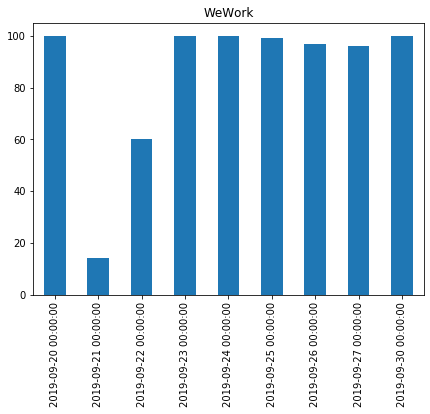

In [10]:
plt.rcParams["figure.figsize"] = (7,5)
ww_articleDF['sourceDate'].value_counts().sort_index().plot(kind='bar', title='WeWork');
# Announced on 09/24.

Because there is only max of 100 tweets that can be pulled from the twitter source per day, if there is more than 100 articles, I am plotting the time delta between in min and max of the tweets subtracted by 1 day. Time delta can be used to extrapolate how much more tweets were generated per day comparatively.

                                    max                 min              diff
sourceDate                                                                   
2019-09-20 00:00:00 2019-09-20 23:16:18 2019-09-19 00:41:48 -1 days +01:25:30
2019-09-21 00:00:00 2019-09-21 23:58:43 2019-09-21 00:17:40          00:18:57
2019-09-22 00:00:00 2019-09-22 23:40:51 2019-09-22 03:20:42          03:39:51
2019-09-23 00:00:00 2019-09-23 23:52:00 2019-09-23 10:31:00          10:39:00
2019-09-24 00:00:00 2019-09-24 23:53:51 2019-09-24 18:33:40          18:39:49
2019-09-25 00:00:00 2019-09-25 23:52:00 2019-09-25 11:01:17          11:09:17
2019-09-26 00:00:00 2019-09-26 23:55:29 2019-09-26 02:20:11          02:24:42
2019-09-27 00:00:00 2019-09-27 23:19:53 2019-09-27 09:02:03          09:42:10
2019-09-30 00:00:00 2019-09-30 23:47:45 2019-09-30 12:48:50          13:01:05


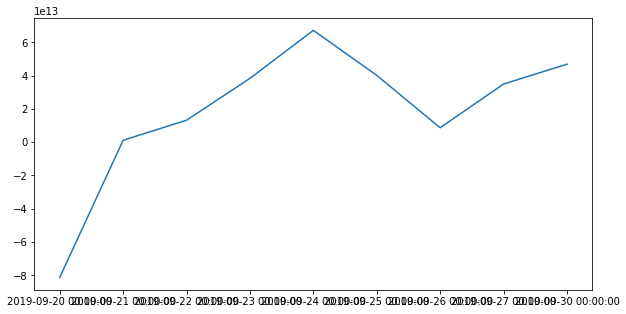

In [11]:
ww_result = ww_articleDF.groupby('sourceDate')['createdTimestamp'].agg(['max','min'])

ww_result['max'] =  pd.to_datetime(ww_result['max'], format='%Y-%m-%d %H:%M:%S')
ww_result['min'] =  pd.to_datetime(ww_result['min'], format='%Y-%m-%d %H:%M:%S')

ww_result['diff'] = timedelta(days=1) - (ww_result['max']-ww_result['min'])

ww_result.dtypes

print(ww_result)

plt.rcParams["figure.figsize"] = (10,5)
plt.plot(ww_result['diff'])

### 2.2. Plot # of related vs not related group by date

In addition to 

In [12]:
wf_article_related_Y = wf_articleDF[wf_articleDF["isRelated"]=='Y']['sourceDate'].value_counts().sort_index()
wf_article_related_N = wf_articleDF[wf_articleDF["isRelated"]=='N']['sourceDate'].value_counts().sort_index()
wf_article_related_all = pd.concat([wf_article_related_Y, wf_article_related_N], axis=1, ignore_index=False)
wf_article_related_all.columns = ['Y', 'N']

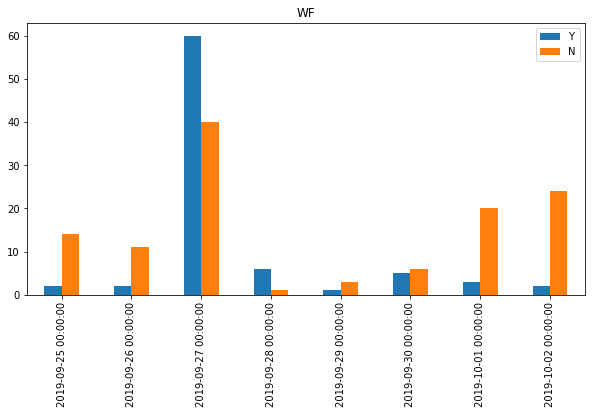

In [13]:
wf_article_related_all.plot(kind="bar", title='WF')

In [14]:
sap_article_related_Y = sap_articleDF[sap_articleDF["isRelated"]=='Y']['sourceDate'].value_counts().sort_index()
sap_article_related_N = sap_articleDF[sap_articleDF["isRelated"]=='N']['sourceDate'].value_counts().sort_index()
sap_article_related_all = pd.concat([sap_article_related_Y, sap_article_related_N], axis=1, ignore_index=False)
sap_article_related_all.columns = ['Y', 'N']

C:\Users\yulmee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


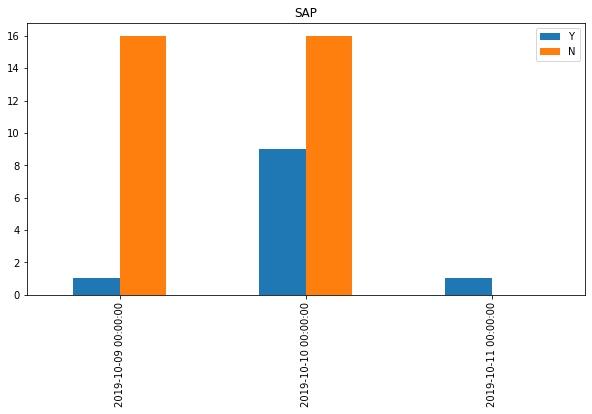

In [15]:
sap_article_related_all.plot(kind="bar", title='SAP')

In [16]:
ww_article_related_Y = ww_articleDF[ww_articleDF["isRelated"]=='Y']['sourceDate'].value_counts().sort_index()
ww_article_related_N = ww_articleDF[ww_articleDF["isRelated"]=='N']['sourceDate'].value_counts().sort_index()
ww_article_related_all = pd.concat([ww_article_related_Y, ww_article_related_N], axis=1, ignore_index=False)
ww_article_related_all.columns = ['Y', 'N']

In [17]:
ww_article_related_all.plot(kind="bar", title='WeWork')

TypeError: Empty 'DataFrame': no numeric data to plot

### 2.3. For related, topics - # of articles, tweets for each topic by date

https://data36.com/pandas-tutorial-2-aggregation-and-grouping/

#### 2.3.1. WF

In [18]:
# TopicsDF
topicsDF.head() 

,Unnamed: 0,id,topic,newsOrTwit
0,0,5dbf6fd211bb5a181c167f4e,NaN,N
1,1,5dbf6fd311bb5a181c167f4f,NaN,N
2,2,5dbf6fd311bb5a181c167f50,NaN,N
3,3,5dbf6fd311bb5a181c167f51,NaN,N
4,4,5dbf6fd311bb5a181c167f52,NaN,N


In [19]:
wf_article_joined = wf_articleDF.set_index('id').join(topicsDF.set_index('id'), lsuffix='_tweet', rsuffix='_topic')

In [20]:
wf_article_joined.head()

,Unnamed: 0_tweet,title,description,content,URL,createdTimestamp,lang,isRelated,source,sourceDate,NP,Unnamed: 0_topic,topic,newsOrTwit
id,,,,,,,,,,,,,,
5dbf6fd211bb5a181c167f4e,0,How Peloton dramatically changed my life: Tech...,Weekly highlight of Yahoo Finance's top tech n...,"Wednesday, September 25, 2019\r\nGet Yahoo Fin...",https://finance.yahoo.com/news/peloton-dramati...,2019-09-25 20:15:00,en,N,WF,2019-09-25 00:00:00,NaN,0,NaN,N
5dbf6fd311bb5a181c167f4f,1,Juul boss exits in vaping crisis as Philip Mor...,"Juul Labs, in which tobacco giant Altria Group...",The chief executive of e-cigarette maker Juul ...,https://economictimes.indiatimes.com/news/inte...,2019-09-25 17:57:59,en,N,WF,2019-09-25 00:00:00,NaN,1,NaN,N
5dbf6fd311bb5a181c167f50,2,Urban Innovation Experts and Tech Luminaries T...,"SAN FRANCISCO, Sept. 25, 2019 /PRNewswire/ -- ...","SAN FRANCISCO, Sept. 25, 2019 /PRNewswire/ --Â...",https://www.prnewswire.com/news-releases/urban...,2019-09-25 16:03:00,en,N,WF,2019-09-25 00:00:00,NaN,2,NaN,N
5dbf6fd311bb5a181c167f51,3,19 of the most powerful women in global finance,Alison Rose will succeed Ross McEwan as CEO of...,"One of the ""big four"" banks in Britain has app...",https://www.businessinsider.com/here-are-the-w...,2019-09-25 15:35:41,en,N,WF,2019-09-25 00:00:00,NaN,3,NaN,N
5dbf6fd311bb5a181c167f52,4,Nike posts 'rock-solid' Q1 with strong women's...,"Despite looming tariffs, CEO Mark Parker expre...",Dive Brief:\r\n<ul><li>Nike on Tuesday announc...,https://www.retaildive.com/news/nike-posts-roc...,2019-09-25 15:15:00,en,N,WF,2019-09-25 00:00:00,NaN,4,NaN,N


In [21]:
wf_grouped_topics_count = wf_article_joined[wf_article_joined["isRelated"]=='Y'].groupby(['topic','sourceDate']).size()

In [22]:
wf_grouped_topics_count_df= wf_grouped_topics_count.to_frame()
wf_grouped_topics_count_df

0
topic                       sourceDate             
Bank of New York            2019-09-27 00:00:00   1
Before-Crypto               2019-09-25 00:00:00   1
Before-Donation             2019-09-25 00:00:00   1
Before-Interest Rate        2019-09-26 00:00:00   1
Before-Scandal              2019-09-26 00:00:00   1
Caution                     2019-09-27 00:00:00   1
Detail Oriented             2019-09-27 00:00:00   1
                            2019-09-28 00:00:00   1
Dimon                       2019-09-27 00:00:00   2
                            2019-09-28 00:00:00   1
                            2019-09-29 00:00:00   1
                            2019-10-02 00:00:00   1
Diversity                   2019-09-27 00:00:00   1
                            2019-09-30 00:00:00   1
New Era                     2019-09-27 00:00:00   1
                            2019-09-30 00:00:00   1
New York                    2019-09-27 00:00:00   2
Not CEO social contribution 2019-10-01 00:00:00   1
Outsider                    2019-09-27 00:00:00   3
                            2019-09-30 00:00:00   1
Pay                         2019-09-27 00:00:00   6
Perfect Person              2019-09-27 00:00:00   7
Shake Up                    2019-09-27 00:00:00   1
Shake up                    2019-09-29 00:00:00   1
Stock                       2019-09-27 00:00:00  13
                            2019-09-28 00:00:00   1
                            2019-10-01 00:00:00   1
                            2019-10-02 00:00:00   1
Tough Job                   2019-09-27 00:00:00  12
                            2019-09-28 00:00:00   2
                            2019-09-30 00:00:00   2
humor                       2019-09-30 00:00:00   1

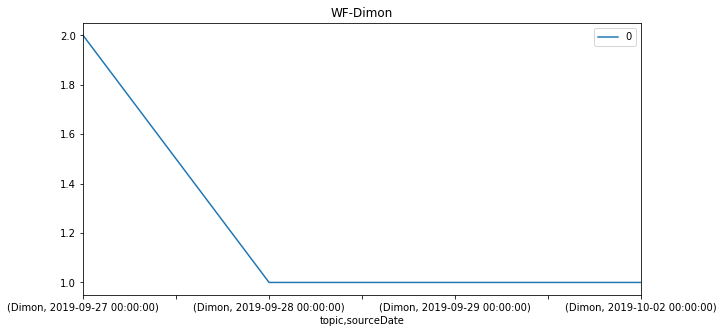

In [23]:
# Plot WF-Dimon
plt.rcParams["figure.figsize"] = (10,5)
wf_grouped_topics_count_df[np.in1d(wf_grouped_topics_count_df.index.get_level_values(0), ['Dimon'])].plot( title="WF-Dimon")
 

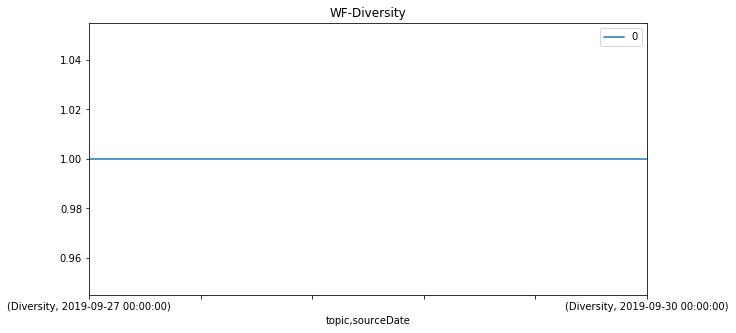

In [24]:
# Plot WF-Diversity 
wf_grouped_topics_count_df[np.in1d(wf_grouped_topics_count_df.index.get_level_values(0), ['Diversity'])].plot(title="WF-Diversity")

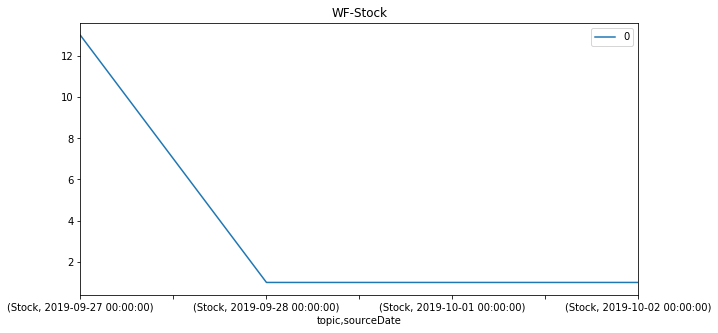

In [25]:
# Stock

wf_grouped_topics_count_df[np.in1d(wf_grouped_topics_count_df.index.get_level_values(0), ['Stock'])].plot(title="WF-Stock")

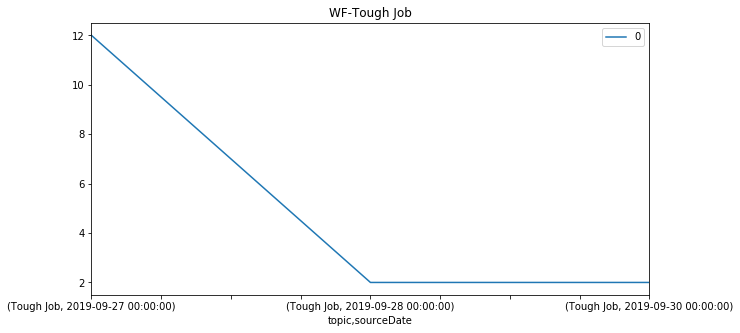

In [26]:
# Tough Job

wf_grouped_topics_count_df[np.in1d(wf_grouped_topics_count_df.index.get_level_values(0), ['Tough Job'])].plot(title="WF-Tough Job")

#### 2.3.2. SAP

In [27]:
sap_article_joined = sap_articleDF.set_index('id').join(topicsDF.set_index('id'), lsuffix='_tweet', rsuffix='_topic')

In [28]:
sap_grouped_topics_count = sap_article_joined[sap_article_joined["isRelated"]=='Y'].groupby(['topic','sourceDate']).size()
sap_grouped_topics_count_df= sap_grouped_topics_count.to_frame()
sap_grouped_topics_count_df

,,0
topic,sourceDate,
Activist Investor,2019-10-11 00:00:00,1
New CEOs,2019-10-10 00:00:00,1
New Gen,2019-10-10 00:00:00,2
Other,2019-10-09 00:00:00,1
Stock,2019-10-10 00:00:00,1


In [29]:
# Diversity

sap_grouped_topics_count_df[np.in1d(sap_grouped_topics_count_df.index.get_level_values(0), ['Diversity'])].plot(title="SAP-Diversity")

TypeError: Empty 'DataFrame': no numeric data to plot

C:\Users\yulmee\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


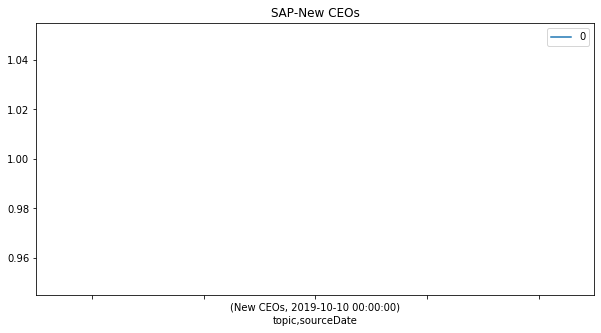

In [30]:
# New CEOs

sap_grouped_topics_count_df[np.in1d(sap_grouped_topics_count_df.index.get_level_values(0), ['New CEOs'])].plot(title="SAP-New CEOs")

In [31]:
#New Era

sap_grouped_topics_count_df[np.in1d(sap_grouped_topics_count_df.index.get_level_values(0), ['New Era'])].plot(title="SAP-New Era")

TypeError: Empty 'DataFrame': no numeric data to plot

In [32]:
# Prev CEO

sap_grouped_topics_count_df[np.in1d(sap_grouped_topics_count_df.index.get_level_values(0), ['Prev CEO'])].plot(title="SAP-Prev CEO")

TypeError: Empty 'DataFrame': no numeric data to plot

### 2.4. for related, topics - # of articles/tweets, how many were positive, negative or neutral by date 

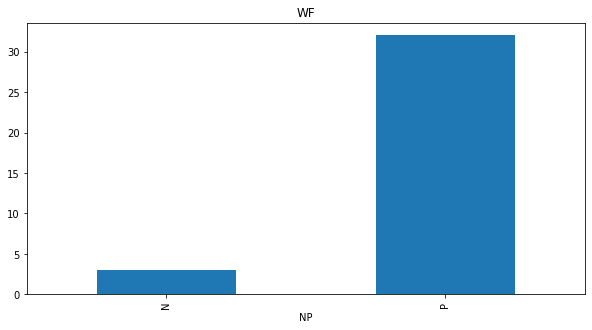

In [33]:
wf_articleDF.groupby(['NP']).size().plot(kind="bar", title='WF')

In [34]:
wf_articleDF_NP_count_df= wf_articleDF.groupby(['NP','sourceDate']).size().to_frame()
# Get percentage of N vs P from total

wf_articleDF_NP_Perc_df= pd.DataFrame({'Percentage': wf_articleDF.groupby(('NP','sourceDate')).size() / wf_articleDF.groupby(('sourceDate')).size()})

C:\Users\yulmee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  after removing the cwd from sys.path.


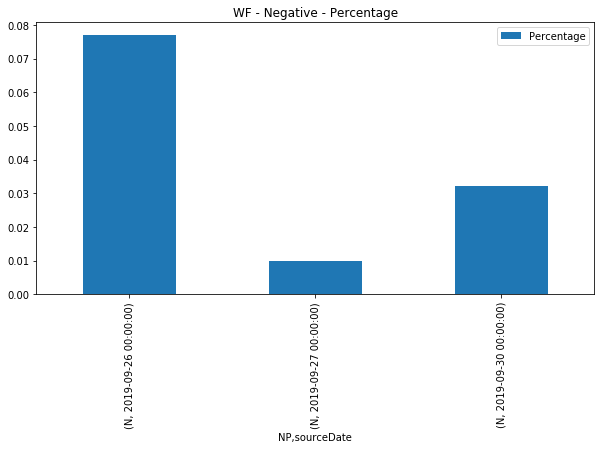

In [35]:

#wf_articleDF_NP_count_df[np.in1d(wf_articleDF_NP_count_df.index.get_level_values(0), ['N'])].plot(kind='bar', title="WF - Negative - Count")
wf_articleDF_NP_Perc_df[np.in1d(wf_articleDF_NP_Perc_df.index.get_level_values(0), ['N'])].plot(kind='bar', title="WF - Negative - Percentage")

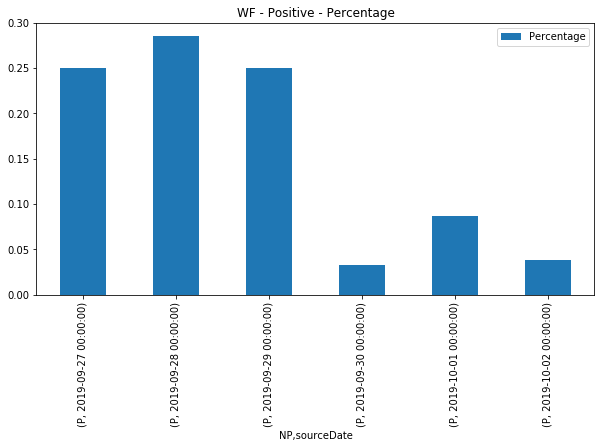

In [36]:
#wf_articleDF_NP_count_df[np.in1d(wf_articleDF_NP_count_df.index.get_level_values(0), ['P'])].plot(kind='bar', title="WF - Positive - Count")
wf_articleDF_NP_Perc_df[np.in1d(wf_articleDF_NP_Perc_df.index.get_level_values(0), ['P'])].plot(kind='bar', title="WF - Positive - Percentage")

P    100.0%
Name: NP, dtype: object


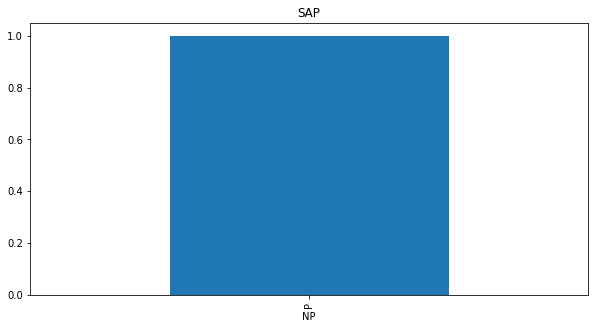

In [37]:
sap_np = sap_articleDF.NP
sap_np_count = sap_np.value_counts()
sap_np_perc = sap_np.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
print(sap_np_perc)
sap_articleDF.groupby(['NP']).size().plot(kind="bar", title='SAP')


In [38]:
sap_articleDF_NP_count_df= sap_articleDF.groupby(['NP','sourceDate']).size().to_frame()
sap_articleDF_NP_count_df

,,0
NP,sourceDate,
P,2019-10-10 00:00:00,1


In [39]:
# Get percentage of N vs P from total

sap_articleDF_NP_Perc_df= pd.DataFrame({'Percentage': sap_articleDF.groupby(('NP','sourceDate')).size() / sap_articleDF.groupby(('sourceDate')).size()})

C:\Users\yulmee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  This is separate from the ipykernel package so we can avoid doing imports until


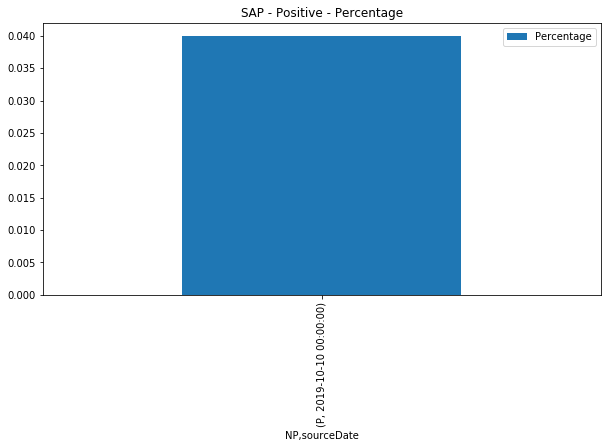

In [40]:
#sap_articleDF_NP_count_df[np.in1d(sap_articleDF_NP_count_df.index.get_level_values(0), ['P'])].plot(kind='bar', title="SAP - Positive - Count")

sap_articleDF_NP_Perc_df[np.in1d(sap_articleDF_NP_Perc_df.index.get_level_values(0), ['P'])].plot(kind='bar', title="SAP - Positive - Percentage")

In [41]:
#sap_articleDF_NP_count_df[np.in1d(sap_articleDF_NP_count_df.index.get_level_values(0), ['N'])].plot(kind='bar', title="SAP - Negative - Count")
sap_articleDF_NP_Perc_df[np.in1d(sap_articleDF_NP_Perc_df.index.get_level_values(0), ['N'])].plot(kind='bar', title="SAP - Negative - Percentage")

TypeError: Empty 'DataFrame': no numeric data to plot